# Intro to Python and First law of Thermodynamics

In this tutorial we are going to go over some basic operations in Python that will guide you through the course and as an example we will use some of the thermodynamic concepts learned in class. <br>
This tutorial can be deployed in  <a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Notes/Coding/answers/intro_thermo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# uncomment the next line to install ipywidgets
# !pip -q install ipywidgets

In [2]:
# import numpy as matplotlib 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from ipywidgets import interact, IntSlider

# Thermodynamics recap

## First Law of Thermodynamics

The change in the internal energy (U) of a system is the sum of the heat (q) transferred to the system and the work (w) done on the system,
$$
dU = q + w
$$

## Heat
The energy that flows in between two objects that are at different temperatures. At constant pressure processes we can define heat as,
$$
dq_{p} = C_{P}dT,
$$
where $C_{P}$ is is the heat capacity of a substance at constant pressure, $C_{P} = mc_{p}$ where $m$ is the mass.

## P-V Work
Work in thermodynamics is defined as in classical mechanics, the energy transferred to a system by applying an external force along a displacement. 
In thermodynamics, one of the most common ways to do wok on a system is by changing the volume of the system through compression of expansion (P-V work).
P-V work is defined as,
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV
$$
where $P(T,V)$ is a function that describes the pressure of the system as a function of temperature (T) and its volume (V).
This type of integrals are known as **line integrals**. 



## Line integral
Let's compute the work done by a processes where the Pressure is given by,
$$
P(V) = \sin(V) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The initial and final volume for this processes are, $V_i = 10$ and $V_f=5$.


Text(0, 0.5, 'P')

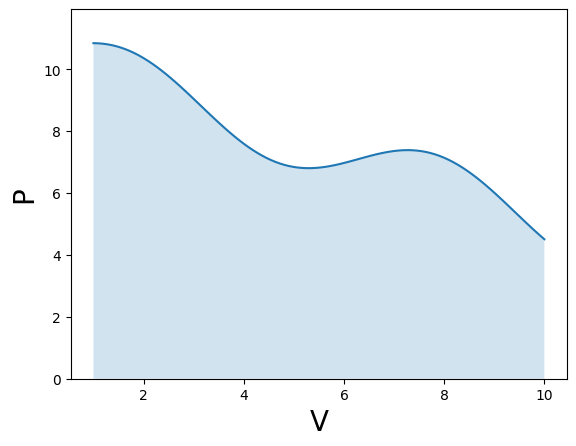

In [3]:
def f_P(V):
    a = -0.55
    b = 10.55
    p = np.sin(V) + a*V + b
    return p

vi = 1.
vf = 10

n = 100
v = np.linspace(vi, vf, n)
p = f_P(v)

# plotting
plt.plot(v, p)
plt.fill_between(v,p,alpha=0.2)
plt.ylim(0,np.max(p)+1.1)
plt.xlabel('V',fontsize=20)
plt.ylabel('P', fontsize=20)

What are the initial and final pressure? 

In [4]:
pi = f_P(vi)
pf = f_P(vf)

print('Initial pressure = ', f'{pi:.3f}')
print('Final pressure = ', f'{pf:.3f}')

Initial pressure =  10.841
Final pressure =  4.506


Using numerical integration, compute the value of the work for this process. <br>
The [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) is one of the most common numerical integration strategies,
$$
\int_a^b f(x) dx \approx  \sum_{i=1}^N \frac{f(x_{i-1}) + f(x_{i})}{2} \Delta x  = \sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x + \sum_{i=1}^N \frac{f(x_{i})}{2} \Delta x
$$
where the partition of $[a,b]$ is $x_0 < x_1 < \cdots < x_N$ where $a = x_0$ and $b = x_N$. <br>
$\Delta x$ is the difference between two consecutive points, $\Delta x = x_{i+1} - x_i$.

If we expand the sum, we get,
$$
% \int_a^b f(x) dx \approx \sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x + \sum_{i=1}^N \frac{f(x_{i})}{2} \Delta x
\int_a^b f(x) dx \approx \frac{\Delta x}{2}\left ( f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + \cdots + f(x_N) \right )
$$


Let's consider 5 grid points $x_0 < x_1 < x_2 < x_3 < x_4$. <br>
How many terms does each term have? 

$$
\sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_0) + f(x_1) + f(x_2) + f(x_3)  \right)
$$
$$
\sum_{i=1}^N \frac{f(x_{i})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_1) + f(x_2) + f(x_3) + f(x_4) \right)
$$
if we sum both terms we get, 
$$
\int_a^b f(x) dx \approx  \frac{\Delta x}{2} \left(  f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + f(x_4)  \right)
$$

From the above equation, we can observe that except from the first ($x_0$) and last ($x_N$) term of the grid points, all other points are multiplied by a factor of 2.<br>

There are are many ways to code the above trapezoidal rule, 
1. For loops --> this tutorial.
2. Element wise vector multiplication --> suggested homework.

**Slicing in Python**
Slice syntax allows us to select a range of items in a list or Numpy array.<br>


In [5]:
x = np.arange(0, 10)
print(x)

# print second element
print(x[1])

# print last element
print(x[-1])

# print elements up to the third one
print(x[:2])

# print(x[::2])

# iterate x reverse order
print(x[::-1])

[0 1 2 3 4 5 6 7 8 9]
1
9
[0 1]
[9 8 7 6 5 4 3 2 1 0]


In [6]:
# code for trapezoidal rule
def trap_rule(y, dx):
    int_value = y[0]*(dx/2) + y[-1]*(dx/2)
    for yi in y[1:-1]:
        int_value += yi*dx
    return int_value

In [7]:
vi = 1. # initial volume
vf = 10 # final volume 
n = 500 # number of grid points
    
v = np.linspace(vi,vf, n) # grid of volume
dv = v[1] - v[0]
p = f_P(v) # value of pressure at each volume

w = trap_rule(p,dv)

print('N =  ', n)
print('DV = ', dv)
print('work = ', w)
                       

N =   500
DV =  0.018036072144288484
work =  69.1043364422275


Compute the true value of $P(T,V)$ for this process.
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV = -\int_{V_{i}}^{V_{f}} \left ( \sin(V) + a V + b \right ) dV 
$$
where $a = -0.55$ and $b = 10.55$.

<!-- w = -69.1044 -->

Using your code, how many grid points are required for numerical integration to approximate the true value  95%. <br>
The formula for mean percentage error (MPE) for a single point is,
$$
MPE =  \left| \frac{y - \hat{y}}{\hat{y}} \right|100\%,
$$
where $\hat{y}$ is the true or exact value and $y$ is the predicted one.


In [8]:
# create a function for the MPE
def MPE(y,y_hat):
    e = (y - y_hat)/y_hat
    return np.abs(e) * 100

itr = 5 -68.46657
itr = 15 -69.05654
itr = 25 -69.08817
itr = 35 -69.09631
itr = 45 -69.09956
itr = 55 -69.10118
itr = 65 -69.10210
itr = 75 -69.10267
itr = 85 -69.10305
itr = 95 -69.10332


Text(0, 0.5, '$\\int P(V) dV$')

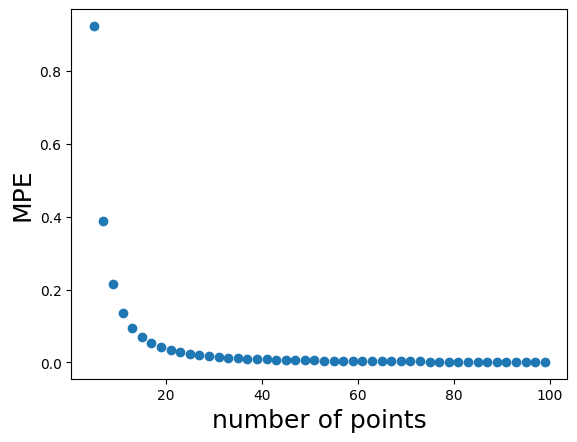

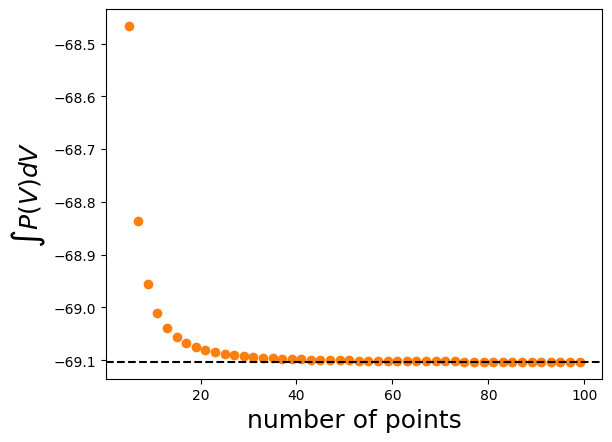

In [9]:

vi = 10  # variable for initial volume
vf = 1  # variable for final volume
w_exact = -69.1044  # exact value of the work for this process

mpe_ = []  # list to store the MPE
w_ = []  # list to store the work values

n_ = np.arange(5, 100, 2)  # grid on total number of integration points
for n in n_:  # iterate over the number of points

    v = np.linspace(vi, vf, n)  # creates a grid of n points between vi and vf
    dv = v[1] - v[0]  # width of the rectangles for integration
    p = f_P(v)  # value of pressure at each volume
    w = trap_rule(p, dv)  # call the trapezoidal rule function
    mpei = MPE(w, w_exact)  # calculate the MPE

    w_.append(w)
    mpe_.append(mpei)
    if (n % 5) == 0:
        print(f'itr = {n}', f'{w:.5f}')

w_ = np.array(w_)
mpe_ = np.array(mpe_)

# # plot
plt.figure(0)
plt.scatter(n_, mpe_)
plt.xlabel('number of points', fontsize=18)
plt.ylabel('MPE', fontsize=18)


# plot
plt.figure(1)
plt.scatter(n_, w_, color='tab:orange')
plt.axhline(y=w_exact, color='k', linestyle='--', label='exact value')
plt.xlabel('number of points', fontsize=18)
plt.ylabel(r'$\int P(V) dV$', fontsize=18)

Let's do the same analysis but now using, 
$$
P(V) = \sin \left (\frac{V}{0.1} \right ) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The integral of this function is, 
$$
\int_{1}^{10} P(V) dV = 67.5549
$$

Text(0, 0.5, 'P(V)')

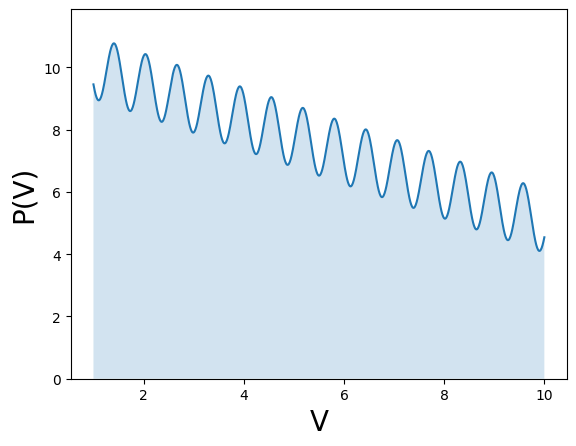

In [10]:
def f_P_new(V):
    a = -0.55
    b = 10.55
    p = np.sin(V/0.1) + a*V + b
    return p


vi = 1.
vf = 10

n = 1000
v = np.linspace(vi, vf, n)
p = f_P_new(v)

# plotting
plt.plot(v, p)
plt.fill_between(v, p, alpha=0.2)
plt.ylim(0, np.max(p)+1.1)
plt.xlabel('V', fontsize=20)
plt.ylabel('P(V)', fontsize=20)

itr: 10, 67.97665
itr: 12, 67.22655
itr: 14, 65.94748
itr: 16, 71.30571
itr: 18, 68.56021
itr: 20, 68.13794
itr: 22, 67.95975
itr: 24, 67.86017
itr: 26, 67.79645
itr: 28, 67.75227
itr: 30, 67.71996
itr: 32, 67.69542
itr: 34, 67.67624
itr: 36, 67.66089
itr: 38, 67.64839
itr: 40, 67.63805
itr: 42, 67.62938
itr: 44, 67.62204
itr: 46, 67.61575
itr: 48, 67.61033


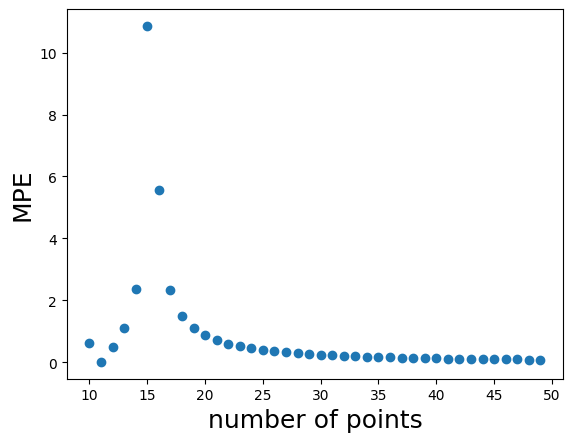

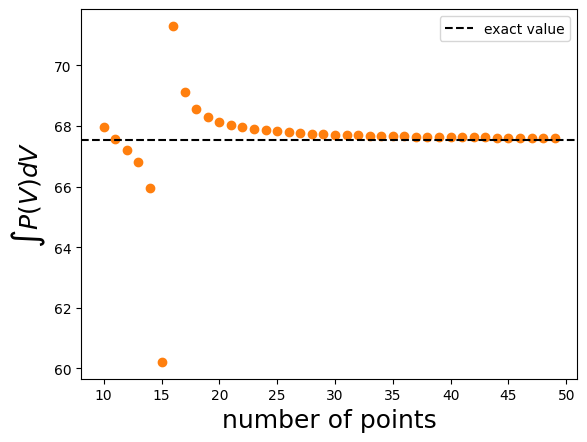

In [11]:
# play around with the number of grid points

vi = 1.  # initial volume
vf = 10  # final volume
w_exact = 67.5549  # exact value of the work for this process

mpe_ = []  # list to store the values
w_ = []  # list to store the values

n_ = np.arange(10, 50, 1)  # grid on total number of integration points
for n in n_:  # iterate over the number of points

    v = np.linspace(vi, vf, n)  # grid of volume
    dv = v[1] - v[0]  # width of the rectangles for integration
    p = f_P_new(v)  # value of pressure at each volume
    w = trap_rule(p, dv)  # call the trapezoidal rule function
    mpei = MPE(w, w_exact)  # calculate the MPE

    w_.append(w)
    mpe_.append(mpei)
    if (n % 2) == 0:
        print(f'itr: {n},', f'{w:.5f}')

w_ = np.array(w_)
mpe_ = np.array(mpe_)

# plot
plt.figure(0)
plt.scatter(n_, mpe_)
plt.xlabel('number of points', fontsize=18)
plt.ylabel('MPE', fontsize=18)


# plot
plt.figure(1)
plt.scatter(n_, w_, color='tab:orange')
plt.axhline(y=w_exact, color='k', linestyle='--', label='exact value')
plt.xlabel('number of points', fontsize=18)
plt.ylabel(r'$\int P(V) dV$', fontsize=18)
plt.legend()

In [ ]:
# ---- Problem parameters (edit these) ----
v_i = 1.0          # initial volume
v_f = 10.0         # final volume
w_exact = 67.5549  # exact work over [v_i, v_f]


def draw(n=14):
    n = max(int(n), 2)
    V = np.linspace(v_i, v_f, n)
    dV = V[1] - V[0]

    # Dense curve for P(V)
    V_dense = np.linspace(v_i, v_f, 1200)
    P_dense = f_P_new(V_dense)

    # Midpoint samples
    V_mid = 0.5*(V[:-1] + V[1:])
    P_mid = f_P_new(V_mid)

    # Integrals
    W_trap = trap_rule(f_P_new(V), dV)

    mpe_trap = MPE(W_trap, w_exact)

    # ---- Plot ----
    plt.figure(figsize=(7.5, 4.5))
    # Underlying function
    plt.plot(V_dense, P_dense, label=r"$P(V)$", color="tab:orange")

    # Midpoint rectangles
    for i in range(len(V)-1):
        vi = V[i]
        vj = V_mid[i]
        pj = P_mid[i]
        plt.vlines([vi, vi + dV], 0, [pj, pj], linestyles="--", color='k')
        plt.hlines(pj, vi, vi + dV, linestyles="--", color='k')
        plt.fill_between([vi, vi + dV], 0, pj, alpha=0.25, color='lightblue')
        plt.scatter([vj], [pj], s=16, color='k')

    # Labels and metrics
    plt.title(fr"$N={n}$")
    plt.xlabel(r"$V$")
    plt.ylabel(r"$P(V)$")
    plt.xticks([v_i, v_f], [r"$V_i$", r"$V_f$"])
    plt.yticks([])
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


interact(draw, n=IntSlider(value=14, min=2, max=120, step=1, description="N"))

interactive(children=(IntSlider(value=14, description='N', max=120, min=2), Output()), _dom_classes=('widget-i…

<function __main__.draw(n=14)>

# Heat Capacity
the heat capacity $C_{P}$ of a substance is the amount of heat absorbed by the system to increase its temperature 1C. <br>

Experimentally one can measure the $C_{P}$ of a substance using a calorimeter for example, where we can measure the temperature and the amount of heat transferred to the substance. <br>
We can approximate the computation of $C_{P}$ as, 
$$
C_{P} = \frac{q}{\Delta T}
$$


The following experimental data contains the measured amount of heat (q) to change 1 kg of an unknown material from the initial temperature ($T_i$) to a final one ($T_f$). <br>

| heat (kJ)   | $T_i$ (C) | $T_f$ (C) |
| -------- | ------- | ------- |
| 9.08 | 21.5 | 31.38 |
| 10.52 | 40.4 | 51.93 |
| 10.27 | 60.36 | 71.44 |
| 7.6 | 81.75 | 90.1 |
| 8.1 | 101.97 | 110.84 |
| 8.38 | 121.32 | 130.31 |
| 9.07 | 141.07 | 150.75 |

**Exercise** <br>
1. Compute the mean and the standard deviation of the $C_{P}$ using this experimental data.

Tips:
1. [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
2. [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [13]:
ti_and_tf = np.array([[21.5 , 31.38],
                      [40.4 , 51.93],
                      [60.36 , 71.44],
                      [81.75 , 90.1],
                      [101.97 , 110.84],
                      [121.32 , 130.31],
                      [141.07 , 150.75]])

dT = ti_and_tf[:, 1] - ti_and_tf[:,0]
q = np.array([9.08, 10.52, 10.27, 7.6, 8.1, 8.38, 9.07])
cp = q/dT
print(cp)

av_cp = np.mean(cp)
std_cp = np.std(cp)
print('mean Cp = ', av_cp)
print('std CP = ', std_cp)

[0.91902834 0.91240243 0.92689531 0.91017964 0.91319053 0.93214683
 0.93698347]
mean Cp =  0.921546649552505
std CP =  0.009770653606471164
